In [1]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import math
import numpy as np
import matplotlib.style as mplstyle
from mpl_toolkits.mplot3d import Axes3D
mplstyle.use('fast')
import Shred_Data as sd
import os
import alphashape
from shapely import plotting as sp


In [ ]:
help(sd)

In [2]:
test = sd.Fin('test', '021920_164435_50mps_Fin_1.xlsx', 'Fin #2.stl')

importing STL data from Fin #2.stl...
done
calculating center of mass...
done
centering fin at the origin...
done
building point cloud...
done
calculating covariances and eigenvalues...
done
alligning fin with cartesian coordinate system
done
importing STL data from Fin #2.stl...
done
calculating center of mass...
done
centering fin at the origin...
done
building point cloud...
done
calculating covariances and eigenvalues...
done
alligning fin with cartesian coordinate system
done


flattening point cloud...
done
building concave hull...
done
restacking exterior coordinates...
done
plotting curve...


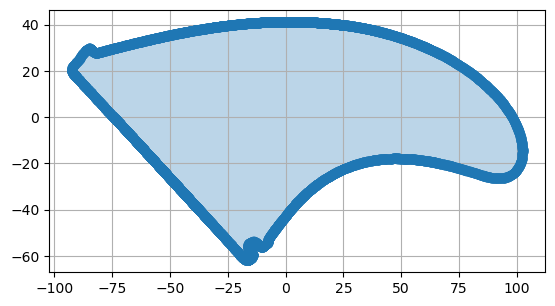

In [3]:
test.get_curve()

defining axes...
done
loading test...
done
scaling axes...
done
plotting...


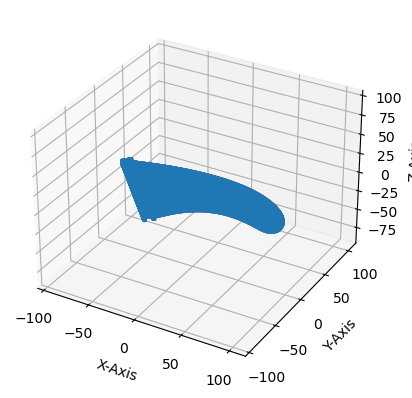

done


In [7]:
test.show_stl()

In [ ]:
array = test.data['Point_Cloud']
array

In [ ]:
new_array = np.delete(array, 2, 1)
print(new_array)

In [ ]:
plt.scatter(x = new_array[:,0], y = new_array[:,1])

In [ ]:
alpha_shape = alphashape.alphashape(new_array,2.0)

In [ ]:
alpha_shape.exterior


In [ ]:
sp.patch_from_polygon(alpha_shape)

In [ ]:
sp.plot_polygon(alpha_shape)

In [ ]:
alpha_shape.exterior.coords.xy[1]

In [ ]:
y = np.array(alpha_shape.exterior.coords.xy[1])

In [ ]:
x = np.array(alpha_shape.exterior.coords.xy[0])

In [ ]:
xy = np.column_stack((x,y))

In [ ]:
plt.scatter(x,y)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = new_array[:,0], y = new_array[:,1])
ax.add_patch(PolygonPatch(alpha_shape))
plt.show()

In [ ]:
test.show_stl()

In [ ]:
test.data['STL'].points[0]

In [ ]:
figure = plt.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(test.vectors))

# Auto scale to the mesh size
scale = test.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

In [ ]:
help(test)

In [ ]:
def draw3DRectangle(ax, x1, y1, z1, x2, y2, z2):
    # the Translate the datatwo sets of coordinates form the apposite diagonal points of a cuboid
    ax.plot([x1, x2], [y1, y1], [z1, z1], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z1, z1], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z1, z1], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z1, z1], color='b') # <--

    ax.plot([x1, x2], [y1, y1], [z2, z2], color='b') # | (up)
    ax.plot([x2, x2], [y1, y2], [z2, z2], color='b') # -->
    ax.plot([x2, x1], [y2, y2], [z2, z2], color='b') # | (down)
    ax.plot([x1, x1], [y2, y1], [z2, z2], color='b') # <--
    
    ax.plot([x1, x1], [y1, y1], [z1, z2], color='b') # | (up)
    ax.plot([x2, x2], [y2, y2], [z1, z2], color='b') # -->
    ax.plot([x1, x1], [y2, y2], [z1, z2], color='b') # | (down)
    ax.plot([x2, x2], [y1, y1], [z1, z2], color='b') # <--

In [ ]:
fin = mesh.Mesh.from_file('Fin #2.stl')

In [ ]:
# Create a new plot
figure = plt.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))
# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
axes.set_xlabel("x")
# Show the plot to the screen

plt.show()

In [ ]:
fin = mesh.Mesh.from_file('Fin #2.stl')

cog = fin.get_mass_properties()[1]
print(cog)
stl_shape = fin.vectors.shape
print(stl_shape)
cog_vector = np.full((stl_shape), cog)



fin.vectors = fin.vectors - cog_vector
print(fin.vectors.shape)
print(fin.points.shape)

In [ ]:
print(fin.points[0])
print(fin.points[0][0],fin.points[0][3],fin.points[0][6])

In [ ]:
x=[]
y=[]
z=[]
for i in range(0, len(fin.points)):
    x.append(fin.points[i][0])
    x.append(fin.points[i][3])
    x.append(fin.points[i][6])
    y.append(fin.points[i][1])
    y.append(fin.points[i][4])
    y.append(fin.points[i][7])
    z.append(fin.points[i][2])
    z.append(fin.points[i][5])
    z.append(fin.points[i][8])

In [ ]:
fincloud = np.stack([x,y,z])


center = np.mean(fincloud, axis=1)
cov = np.cov(fincloud)
eigvalues, eigvectors = np.linalg.eig(cov)

fincloud_centered = fincloud - center[:,np.newaxis]

In [ ]:
print(fincloud_centered)
print(fin.vectors)

In [ ]:
str(type(fincloud))

In [ ]:
cart_alligned_fin = np.matmul(eigvectors.T, fincloud_centered)

In [ ]:
newpoints = []
for i in range(0,len(cart_alligned_fin[0])):
    newpoints.append([cart_alligned_fin[0][i],cart_alligned_fin[1][i],cart_alligned_fin[2][i]])

In [ ]:
newpointsarray=np.stack(newpoints)

In [ ]:
%matplotlib widget
fin.vectors = np.reshape(newpointsarray, stl_shape)
# Create a new plot
figure = plt.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

In [ ]:


xmin, xmax, ymin, ymax, zmin, zmax = np.min(fincloud_centered[0,:]), np.max(fincloud_centered[0,:]), np.min(fincloud_centered[1,:]), np.max(fincloud_centered[1,:]), np.min(fincloud_centered[2,:]), np.max(fincloud_centered[2,:])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fincloud[0,:], fincloud[1,:], fincloud[2,:], label="original data")
ax.scatter(fincloud_centered[0,:], fincloud_centered[1,:], fincloud_centered[2,:], label="centered data")
ax.scatter(center[0],center[1],center[2], label="original center")


ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=2)


ax.plot([0, eigvectors[0, 0]],  [0, eigvectors[1, 0]], [0, eigvectors[2, 0]], color='r', linewidth=2)
ax.plot([0, eigvectors[0, 1]],  [0, eigvectors[1, 1]], [0, eigvectors[2, 1]], color='g', linewidth=2)
ax.plot([0, eigvectors[0, 2]],  [0, eigvectors[1, 2]], [0, eigvectors[2, 2]], color='k', linewidth=2)


draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

In [ ]:
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [ ]:
fin.save('fin_cog.stl')

In [ ]:
#Testing 3D Bounding Boxes and point clouds in small clouds
x = np.linspace(3,5,25) + np.random.normal(0,0.2,25)
y = np.linspace(3,5,25) + np.random.normal(0,0.2,25)
z = np.linspace(3,5,25) + np.random.normal(0,0.2,25)
PC = np.stack([x,y,z])

In [ ]:
%matplotlib widget
center = np.mean(PC, axis=1)
cov = np.cov(PC)
eigvalues, eigvectors = np.linalg.eig(cov)

PC_centered = PC - center[:,np.newaxis]

xmin, xmax, ymin, ymax, zmin, zmax = np.min(PC_centered[0,:]), np.max(PC_centered[0,:]), np.min(PC_centered[1,:]), np.max(PC_centered[1,:]), np.min(PC_centered[2,:]), np.max(PC_centered[2,:])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PC[0,:], PC[1,:], PC[2,:], label="original data")
ax.scatter(PC_centered[0,:], PC_centered[1,:], PC_centered[2,:], label="centered data")
ax.scatter(center[0],center[1],center[2], label="original center")


ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=2)


ax.plot([0, eigvectors[0, 0]],  [0, eigvectors[1, 0]], [0, eigvectors[2, 0]], color='r', linewidth=2)
ax.plot([0, eigvectors[0, 1]],  [0, eigvectors[1, 1]], [0, eigvectors[2, 1]], color='g', linewidth=2)
ax.plot([0, eigvectors[0, 2]],  [0, eigvectors[1, 2]], [0, eigvectors[2, 2]], color='k', linewidth=2)


draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

In [ ]:
cart_alligned_PC = np.matmul(eigvectors.T, PC_centered)

xmin, xmax, ymin, ymax, zmin, zmax = np.min(cart_alligned_PC[0, :]), np.max(cart_alligned_PC[0, :]), np.min(cart_alligned_PC[1, :]), np.max(cart_alligned_PC[1, :]), np.min(cart_alligned_PC[2, :]), np.max(cart_alligned_PC[2, :])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PC_centered[0,:], PC_centered[1,:], PC_centered[2,:], label="centered data")
ax.scatter(cart_alligned_PC[0,:],cart_alligned_PC[1,:],cart_alligned_PC[2,:], label="cartesian alligned data")


ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=2)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=2)

ax.plot([0, eigvectors[0, 0]],  [0, eigvectors[1, 0]], [0, eigvectors[2, 0]], color='r', linewidth=2)
ax.plot([0, eigvectors[0, 1]],  [0, eigvectors[1, 1]], [0, eigvectors[2, 1]], color='g', linewidth=2)
ax.plot([0, eigvectors[0, 2]],  [0, eigvectors[1, 2]], [0, eigvectors[2, 2]], color='k', linewidth=2)

draw3DRectangle(ax, xmin, ymin, zmin, xmax, ymax, zmax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()